# Practical 9. Machine Learning Assignment.

--- 
Due date is March 21, before the class. 

Additional reading:
- [Documentation on sklearn PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html),
- [Useful visualization](http://setosa.io/ev/principal-component-analysis/), 
- [This tutorial](http://www.iro.umontreal.ca/~pift6080/H09/documents/papers/pca_tutorial.pdf) is extremely detailed and useful for understanding PCA.


Email me (Eugene) with the questions. We can arrange office hours: e.klyshko@mail.utoronto.ca



## Problem 1. Principal Components of handwriting 

Perform principal component analysis on the 1000 points of MNIST data set. Run the first cell to load the data in the variable `X`. `Y` contains the label of each handwritten digit, i.e. the number, or the class.

![](pics/mnist.png)

1. Plot the **total** variance vs the number of PCs used. **Hint**: variable `explained_variance_ratio_` may be useful. For the first PC, the variance is $V_1$, for the first two PCs: $V_1 + V_2$, for the first three, $V_1 + V_2 + V_3$, an so on... 
2. Use the first two component to represent MNIST data set in two dimensions on a scatter plot. 
3. Show the image of the first two principal eigenvectors. **Hint**: variable `components_` and function `reshape()` might be useful.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
X = x_test[:1000]
Y = y_test[:1000]
X = X.reshape(1000, 784)
plt.style.use('seaborn-darkgrid')

Variance of each PC: (784,)


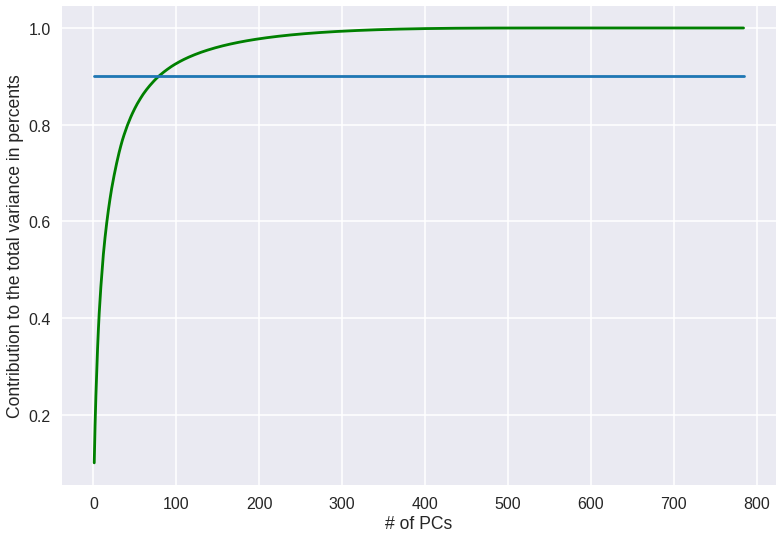

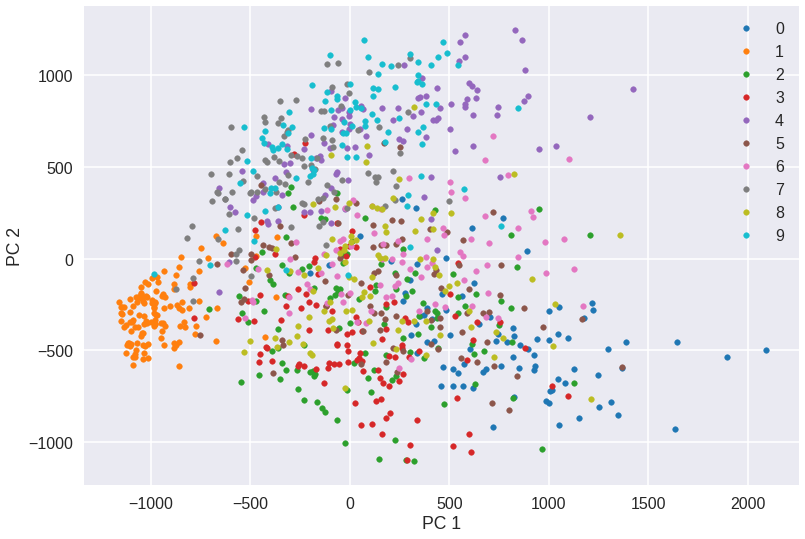

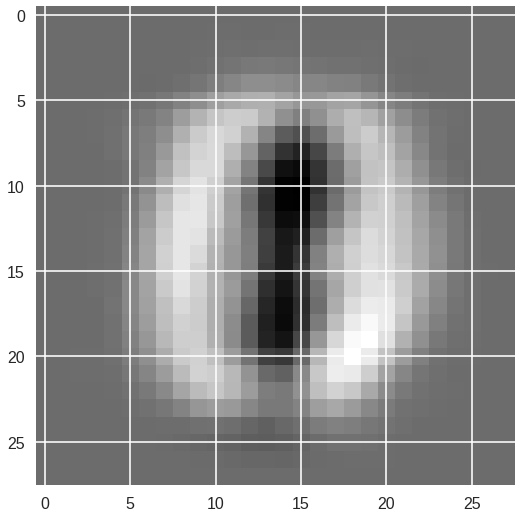

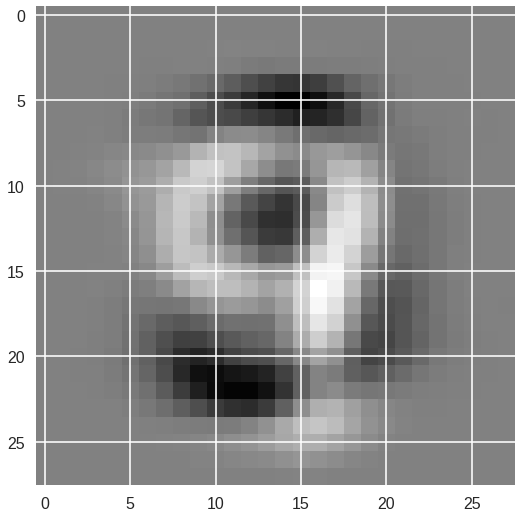

In [15]:
plt.style.use('seaborn-poster')

from sklearn.decomposition import PCA
## Compute principal component analysis for the data set X
pca_analysis = PCA().fit(X)

## Make a transformation of the original data set X onto PC axes
pca_X = pca_analysis.transform(X)

#1

# Let's look at the variance proportion for each PC:
print("Variance of each PC: {}".format(pca_analysis.explained_variance_ratio_.shape))

# Run a cumulative sum to find a contribution of the first 1, then first 2, then first 3 and so on...
variance = np.cumsum(pca_analysis.explained_variance_ratio_)

# Plot cumsum:

number_of_PC = np.arange(1, len(variance)+1)
plt.plot(number_of_PC, variance, 'g-')
plt.xlabel('# of PCs')
plt.ylabel('Contribution to the total variance in percents')

# Plot 90% variance line
plt.plot(number_of_PC, np.array([0.9]*len(variance)))
plt.show()
         
#2

# Scatter plot all MNIST data set in 2D using only first two PCs - with labels

for label in set(Y):
    mask = Y==label
    plt.scatter(pca_X[:,0][mask], pca_X[:,1][mask], marker = '.', label = label)
plt.legend()
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

#3

# Plotting the first and second PC vector by reshaping it back to 28x28 matrix
plt.imshow(pca_analysis.components_[0].reshape(28,28), cmap='gray')
plt.show()

plt.imshow(pca_analysis.components_[1].reshape(28,28), cmap='gray')
plt.show()

## Problem 2. The Old World Map

Find the relative coordinates (sketch of the map) of the European cities knowing only pairwise distances between them. [Documentation on MDS](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html).
**Remember that MDS embedding may require rotation and/or horizontal and vertical flip.** You should get relative locations similar to these:
![](pics/europe.jpg)

In [16]:
import pandas as pd
# Pairwise distance between European cities

# Downloading the data set:
url = 'https://raw.githubusercontent.com/neurospin/pystatsml/master/datasets/eurodist.csv'
df = pd.read_csv(url)

# Exploring the downloaded data: printing only first 7x7 corner of the data frame.
print(df.iloc[:7, :7])
print()

## Create an array with cities' names:
city = np.array(df["city"])
print(city)

## Getting a full numpy squareform distance matrix from pandas dataframe:
D = np.array(df.iloc[:, 1:]) 
print(D.shape) # the shape of the distance matrix

         city  Athens  Barcelona  Brussels  Calais  Cherbourg  Cologne
0      Athens       0       3313      2963    3175       3339     2762
1   Barcelona    3313          0      1318    1326       1294     1498
2    Brussels    2963       1318         0     204        583      206
3      Calais    3175       1326       204       0        460      409
4   Cherbourg    3339       1294       583     460          0      785
5     Cologne    2762       1498       206     409        785        0
6  Copenhagen    3276       2218       966    1136       1545      760

['Athens' 'Barcelona' 'Brussels' 'Calais' 'Cherbourg' 'Cologne'
 'Copenhagen' 'Geneva' 'Gibraltar' 'Hamburg' 'Hook of Holland' 'Lisbon'
 'Lyons' 'Madrid' 'Marseilles' 'Milan' 'Munich' 'Paris' 'Rome' 'Stockholm'
 'Vienna']
(21, 21)


Athens [-2757.06653347    40.08262692]
Barcelona [ 189.87671884 -971.08351107]
Brussels [220.84329267 345.20796167]
Calais [412.78853654 297.98884952]
Cherbourg [670.23863316  48.79380249]
Cologne [ 88.98618579 555.28723878]
Copenhagen [ 191.27162723 1256.36424602]
Geneva [-187.8678645  -251.38359089]
Gibraltar [ 1028.95518439 -1813.800875  ]
Hamburg [ 54.35056533 940.89233561]
Hook of Holland [274.48866885 565.6591565 ]
Lisbon [ 1412.13663761 -1336.42008042]
Lyons [   2.6289996  -274.22104898]
Madrid [  849.30288004 -1154.53607178]
Marseilles [-106.760506  -574.2375601]
Milan [-496.38051879 -161.07553536]
Munich [-496.15979034  308.39264154]
Paris [284.0184114   72.55725147]
Rome [-1176.11291722  -331.71989654]
Stockholm [ 445.20996768 1919.08138419]
Vienna [-904.74817884  518.17067544]


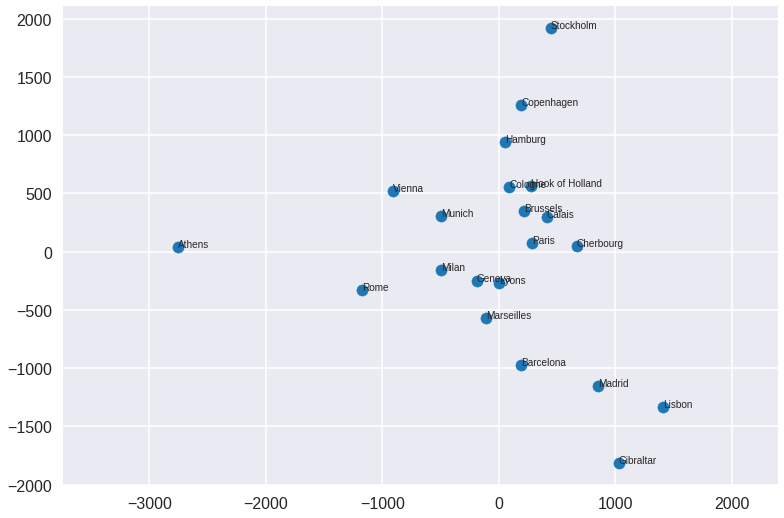

In [18]:
## Write your code here
from sklearn.manifold import MDS

# Use MDS on precomputed distance matrix and apply transformation
Xr = MDS(dissimilarity='precomputed', n_components=2).fit_transform(D)

# plot preliminary coordinates
plt.scatter(Xr[:, 0], Xr[:, 1], marker='o')
for i in range(len(city)):
    plt.text(Xr[i, 0], Xr[i, 1], city[i])
    print(city[i], Xr[i,:])
plt.axis('equal')
plt.show()

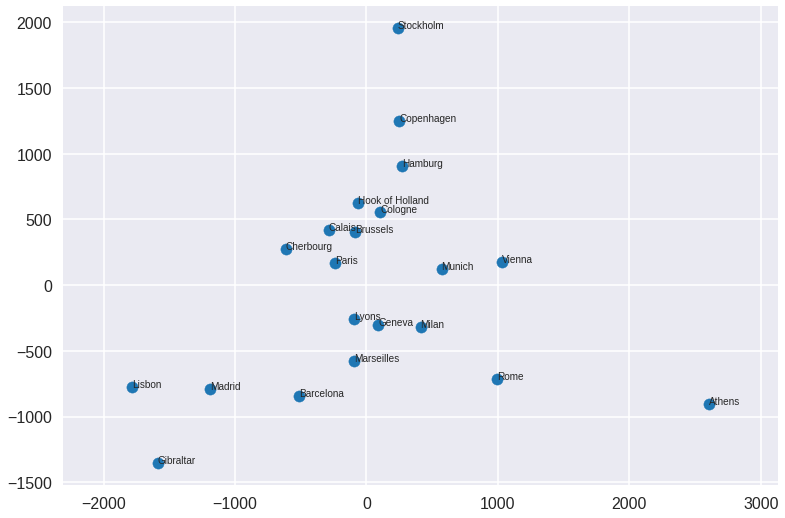

In [23]:
# Plot: apply some rotation and/or flip

## angle of rotation
theta = 10 * np.pi / 180.

# matrix of rotation
rot = np.array([[np.cos(theta), -np.sin(theta)],
                [np.sin(theta), np.cos(theta)]])

#apply rotation:
Xr = np.dot(Xr, rot)

# flip x
#Xr[:, 0] *= -1

#Plotting the result
plt.scatter(Xr[:, 0], Xr[:, 1], marker='o')
for i in range(len(city)):
    plt.text(Xr[i, 0], Xr[i, 1], city[i])
    #print(city[i], Xr[i,:])
plt.axis('equal')
plt.show()

## Problem 3. Machine Learning analysis of the MD simulation.

$C_{\alpha}$ atom is the carbon atom of the aminoacid which connect aminoacid side chain to the backbone. The protein with $N$ aminoacids contains exatly $N$ $C_{\alpha}$ atoms. You can select them from the trajectory using `select_atoms('name CA')` function in `MDAnalysis` module:

```python
import MDAnalysis as md
sys = md.Universe(PDB_FILE, DCD_FILE)
CA_atoms = sys.select_atoms('name CA')
```

Let’s suppose you have a trajectory of a protein with $N$ $C_{\alpha}$ atoms and $M$ frames. The feature vector with pairwise distances between all possible pairs of $C_{\alpha}$ will have $N(N-1)/2$ components (features, dimensions) for only one frame. Thus, your full dataset `X` will have $M \times N(N-1)/2$ shape.

In the practical 7, you run an MD simulation of `polyGLY` in 300 K environment. Use the `*.pdb` file and `*.dcd` file with the 300 K trajectory as your input.

1. Generate a dataset `X` in which you will look at the vectors of all pairwise distances between $C_{\alpha}$ atoms for each time frame. 

2. Perform PCA analysis of the dataset `X`. Determine the number of PCs that correspond to > 90% of the total variance. 

3. Scatter plot the data set `X` using only first 2 PCs. Do you see any regularities, e.g. dense regions of the plot? If yes, think about which part of the trajectory (beginning or end) they correspond to. Check your hypothesis. Explain your results.

(500, 300) (500, 300)
The number of PCs to account for variance at least 90% is  1
Actual variance is  0.9197264471243793


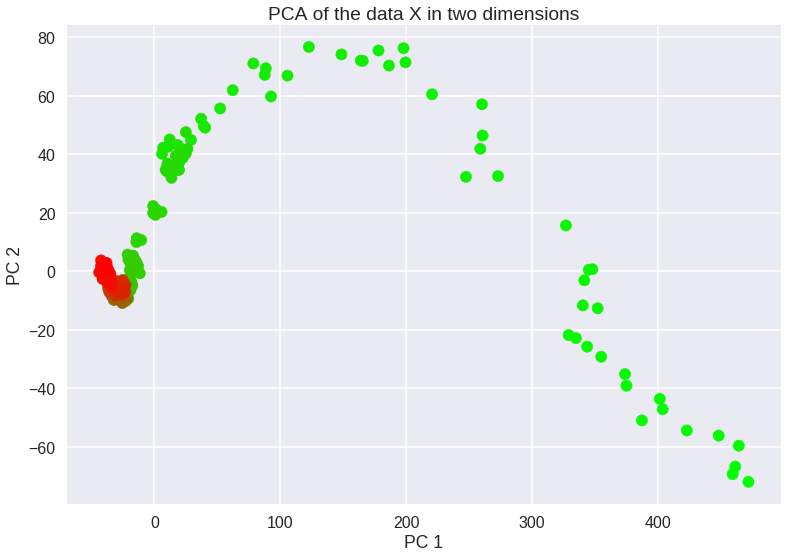

In [25]:
import MDAnalysis as md
import numpy as np

# 1

# Loading coordinate and trajectory files into system

pdb_file = 'polyGLY.pdb'
dcd_file = 'polyGLY_300_traj.dcd'  
sys = md.Universe(pdb_file, dcd_file)

# Selecting only alpha carbons
CA_atoms = sys.select_atoms('name CA')

# Number of Alpha carbons atoms
N = len(CA_atoms)
M = len(sys.trajectory)

#Calculate pairwise distances
'''
from scipy.spatial.distance import pdist
X = []
for frame in sys.trajectory:
    X.append(pdist(CA_atoms.positions))
X = np.array(X)
'''

## More intuitive way to do that:
X = np.empty((M, int(N * (N - 1) / 2)))

# using counter
k = 0 

# for each frame of the trajectory
for frame in sys.trajectory:
    x = []
    # double loop for every pair i,j of atoms avoiding the duplicates
    for i in range(len(CA_atoms)):
        for j in range(len(CA_atoms)):
            if j > i :
                # find distance of the vector connecting two atoms
                d = np.linalg.norm(CA_atoms[i].position - CA_atoms[j].position)
                x.append(d)
    # making an numpy array and add that to the X
    x = np.array(x)
    X[k] = x
    k += 1 

# Checking the dimensionality
print(X.shape, (M, int(N * (N - 1) / 2)))



# 2.

from sklearn.decomposition import PCA 

# Total number of components (N*(N-1)/2)
total_num_components = int(N * (N - 1) / 2)
pca_analysis = PCA(n_components = total_num_components).fit(X)

# Run a cumulative sum to find a contribution of the first 1, then first 2, then first 3 and so on...
variance = np.cumsum(pca_analysis.explained_variance_ratio_)
components_90 = 0
for i, v in enumerate(variance):
    if (v > 0.9):
        components_90 = i + 1
        print("The number of PCs to account for variance at least 90% is ", components_90)
        print('Actual variance is ', v)
        break


# 3


# Transform the data X
X_transformed = pca_analysis.transform(X) 

colors = np.array([np.linspace(0, 1, X_transformed.shape[0]), np.linspace(1, 0, X_transformed.shape[0]), np.zeros(X_transformed.shape[0])])

# Use the first two PCs to plot the data in 2D
plt.scatter(X_transformed[:,0], X_transformed[:,1], marker='o', c=colors.T)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA of the data X in two dimensions")
plt.show()



![](https://static.wixstatic.com/media/1ade3f_03ac33e0a1de4ad5a560d9354abe1fcb~mv2.gif)
![](https://banner2.kisspng.com/20180724/ic/kisspng-protein-folding-folding-funnel-energy-landscape-5b56bf1213b7d4.1095577315324116660808.jpg)
